# **CNN assignment**(Do read the note at the end)

Description: Here we are going to use CNN to classify images of elephants,tigers,cheetah's and crocodiles. Basically multiclass classificiation using CNN.

**Q.1** Import all required modules

In [4]:
#Your code here
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
import tensorflow.keras.layers as layers
from tensorflow.keras.layers import Dense

**Q.2** Load data using image_dataset_from_directory(https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory)

In [5]:
!unzip data-20240716T071532Z-001.zip -d.

Archive:  data-20240716T071532Z-001.zip
  inflating: ./data/Tiger/toledo-zoo-tigers-mc-230927-e3a0a6.jpg  
  inflating: ./data/Tiger/tiger-hero.jpg  
  inflating: ./data/Tiger/Bengal-Tiger_Madhumay-Mallik-copy-scaled.jpg  
  inflating: ./data/Tiger/tiger_pho_0000.jpg  
  inflating: ./data/Tiger/040420OTIGER20pair.jpg  
  inflating: ./data/Tiger/360_F_556077771_oM3lqrD8CctJYoKm0pi8MDWurA5pMSJZ.jpg  
  inflating: ./data/Tiger/Big_Story_Tiger_Bandhavgarh_1654234909081_1682950767671.jpg  
  inflating: ./data/Tiger/VIER20PFOTEN_2017-10-20_164-2668x2667-600x600.jpg  
  inflating: ./data/Tiger/IMG_9210-scaled-1200x1200-cropped.jpg  
  inflating: ./data/Tiger/runs-snow-water-captive-moravia-73293973.jpg  
  inflating: ./data/Tiger/Exp_tigers.jpg  
  inflating: ./data/Tiger/kai-1_29.7.22-1024x1024.jpg  
  inflating: ./data/Tiger/Behind-the-Roar-Understanding-Behavior-of-Tigers_405386653.jpg  
  inflating: ./data/Tiger/A-Day-In-The-Life-of-a-Majestic-Tiger_2383399557.jpg  
  inflating: ./data/Ti

In [6]:
#Your code here
data = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/data',
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=32,
    image_size=(128, 128),
    shuffle=True
)

Found 1663 files belonging to 4 classes.




```
# This is formatted as code
```



*   Since data object is not iterable,we will create a nummpy iterator for data.
*   Then use batch to iterate through our data



In [7]:
data_iterator=data.as_numpy_iterator()

In [12]:
batch=data_iterator.next()

Run the below code and batch code 2-3 times to visualise the labels given to different animals.

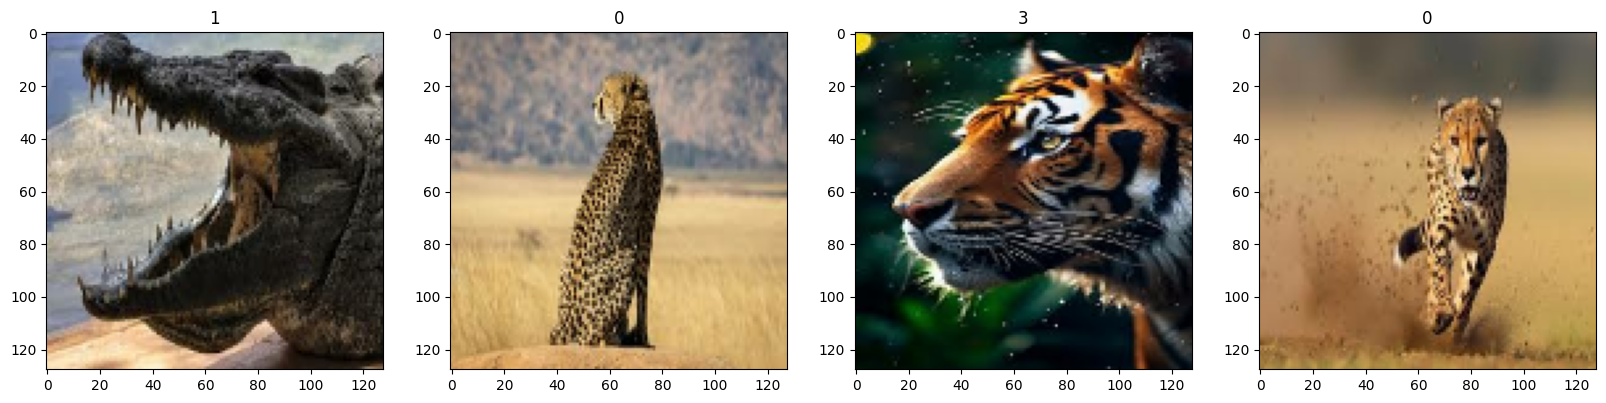

In [13]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

**Q.3** Map the data such that all pixel values lie between 0 and 1 using the **lambda function**

In [14]:
data=data.map(lambda x, y: (tf.cast(x , tf.float32) / 255.0 , y))

**Q.4** Split the data into train set and test set(and validation set if needed) using **data.take**(https://www.geeksforgeeks.org/tensorflow-js-tf-data-dataset-class-take-method/) and **data.skip**(https://www.geeksforgeeks.org/tensorflow-js-tf-data-dataset-skip-method/)

In [15]:
#Your code here
train_data = data.take(41)
test_data = data.skip(41)

**Creating the model**

**Q.5** Write code to create CNN model including fully connected layers with softmax as final layer.

In [16]:
#Your code here
model = Sequential([
    layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(16, activation='relu'),
    Dense(4, activation='softmax')
])

**Q.6** Compile your model

In [17]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

**Q.7** Fit your model with train set and make sure to keep **less epochs**(10-15) as the dataset size is very large.

In [18]:
model.fit(
    train_data,
    epochs = 10,
    batch_size = 32,
    verbose=1,
    validation_data = test_data
)

Epoch 1/10
41/41 [==============================] - 21s 348ms/step - loss: 1.4000 - accuracy: 0.3003 - val_loss: 1.3656 - val_accuracy: 0.2678
Epoch 2/10
41/41 [==============================] - 16s 346ms/step - loss: 1.3338 - accuracy: 0.3689 - val_loss: 1.2842 - val_accuracy: 0.4188
Epoch 3/10
41/41 [==============================] - 16s 343ms/step - loss: 1.2251 - accuracy: 0.4558 - val_loss: 1.0721 - val_accuracy: 0.5442
Epoch 4/10
41/41 [==============================] - 16s 345ms/step - loss: 1.0129 - accuracy: 0.5816 - val_loss: 0.9614 - val_accuracy: 0.6011
Epoch 5/10
41/41 [==============================] - 15s 343ms/step - loss: 0.7688 - accuracy: 0.7027 - val_loss: 0.7142 - val_accuracy: 0.7265
Epoch 6/10
41/41 [==============================] - 15s 340ms/step - loss: 0.5665 - accuracy: 0.7942 - val_loss: 0.5926 - val_accuracy: 0.7464
Epoch 7/10
41/41 [==============================] - 19s 420ms/step - loss: 0.3373 - accuracy: 0.8887 - val_loss: 0.5210 - val_accuracy: 0.8091

**Q.8** Test your code with test set

In [19]:
loss,accuracy=model.evaluate(test_data)

11/11 [==============================] - 9s 59ms/step - loss: 0.5298 - accuracy: 0.8604


In [20]:
# Do not change this code
if accuracy>=0.85:
  print("Congratulations, CNN assignment complete!!")
else:
  print("Try again, not enough accuracy")

Congratulations, CNN assignment complete!!


**Note: 1. Many of you will get very high train accuracy but low test accuracy. This is called overfitting, this can be solved by increase the train set size. If your getting low accuracy for both train and test, modify your layers in the model.**

**2.Do use T4GPU.Ideally your first epoch will take quite sometime and rest of the epochs will be faster but if all your epochs are taking a lot of time, try starting a new gpu session(open a new gmail account and open colab on that) because your free gpu might have exhausted itself.**

**3.Other than its a easy task, happy learning!!**